In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_generation import get_data, g_0, m_0

In [2]:
%%time
N = 10**6
rng = np.random.default_rng(seed=123)
att_list, d_mean_list = [], []

for l in range(100):
    y, d, x = get_data(N, rng)
    att_list.append(np.mean(g_0(1,x[d==1])-g_0(0,x[d==1])))
    d_mean_list.append(np.mean(d))

att = np.mean(att_list)
print(att)
d_mean = np.mean(d_mean_list)
print(d_mean)

0.37742579712147
0.4392839899999999
CPU times: total: 1min 44s
Wall time: 1min 34s


In [3]:
def mm_ate(y_data, d_data, x_data):
    return np.mean(g_0(1, x_data) - g_0(0, x_data) + d_data*(y_data-g_0(1, x_data))/m_0(x_data) - (1-d_data)*(y_data-g_0(0, x_data))/(1-m_0(x_data)))

In [4]:
def mm_att(y_data, d_data, x_data):
    return np.mean(d_data*(y_data-g_0(0, x_data)) - m_0(x_data)*(1-d_data)*(y_data-g_0(0, x_data))/(1-m_0(x_data))) / np.mean(d_data)

In [5]:
%%time
def mc_simulation(N, n_MC=2000):
    rng = np.random.default_rng(seed=123)
    estimates = np.empty((n_MC, 2))

    for j in range(n_MC):
        y_data, d_data, x_data = get_data(N, rng)
        estimates[j, 0], estimates[j, 1] = mm_ate(y_data, d_data, x_data), mm_att(y_data, d_data, x_data)
    
    return estimates

# MC simulation for all sample sizes
results_dict = {}
sample_sizes = [250, 500, 1000, 2000, 4000, 8000, 16000]

for N in sample_sizes:
    results_dict[N] = mc_simulation(N)
    print(f'MC simulation done for N={N}')

MC simulation done for N=250
MC simulation done for N=500
MC simulation done for N=1000
MC simulation done for N=2000
MC simulation done for N=4000
MC simulation done for N=8000
MC simulation done for N=16000
CPU times: total: 4min 14s
Wall time: 4min 19s


### N = 1000

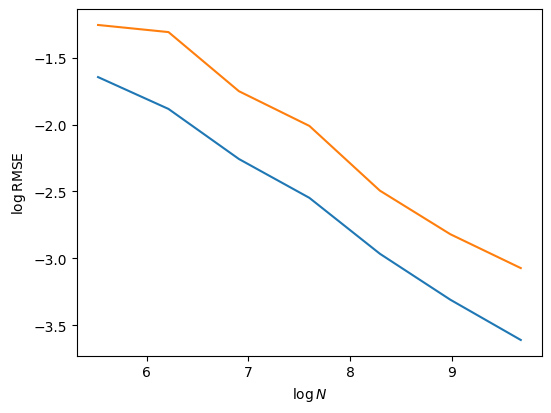

In [6]:
ate = 0.5
rmse = np.empty((len(sample_sizes), 2))

for i, (N, estimates) in enumerate(results_dict.items()):
    rmse[i] = np.sqrt(np.mean((estimates[:1000, :]-np.array([ate, att]))**2, axis=0))

plt.figure(figsize=(6, 4.5))
for k in range(2):
    plt.plot(np.log(sample_sizes), np.log(rmse[:,k]))
plt.xlabel(r'$\log N$')
plt.ylabel(r'$\log$' + 'RMSE')
plt.show()

In [7]:
rmse

array([[0.19291375, 0.28477222],
       [0.15204682, 0.27002325],
       [0.10458251, 0.1735843 ],
       [0.07822752, 0.13391087],
       [0.05153039, 0.08259035],
       [0.03655016, 0.05962505],
       [0.0270512 , 0.04628885]])

In [8]:
slopes = np.polyfit(np.log(sample_sizes), np.log(rmse), 1)[0,:]
-slopes

array([0.48703047, 0.47474976])

### N = 2000

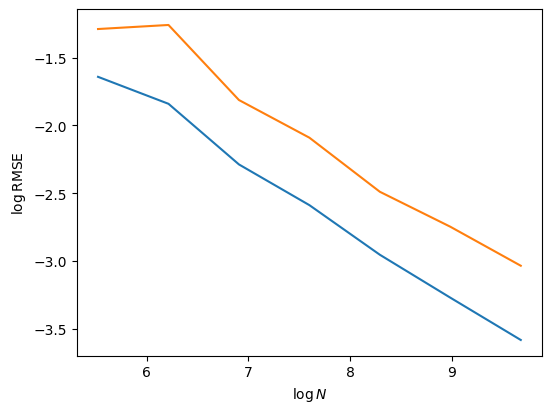

In [9]:
ate = 0.5
rmse = np.empty((len(sample_sizes), 2))

for i, (N, estimates) in enumerate(results_dict.items()):
    rmse[i] = np.sqrt(np.mean((estimates-np.array([ate, att]))**2, axis=0))

plt.figure(figsize=(6, 4.5))
for k in range(2):
    plt.plot(np.log(sample_sizes), np.log(rmse[:,k]))
plt.xlabel(r'$\log N$')
plt.ylabel(r'$\log$' + 'RMSE')
plt.show()

In [10]:
rmse

array([[0.19368325, 0.27554566],
       [0.15873964, 0.28391565],
       [0.10151442, 0.16323646],
       [0.07518497, 0.12364348],
       [0.0521496 , 0.08297836],
       [0.03800289, 0.06412352],
       [0.02781755, 0.04809347]])

In [11]:
slopes = np.polyfit(np.log(sample_sizes), np.log(rmse), 1)[0,:]
-slopes

array([0.48160054, 0.45801304])